In [1]:
# import dependencies
import pandas as pd
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Need improvement---------
# reading CSVs
sales_Jan = pd.read_csv('Sales_January_2019.csv')
sales_Feb = pd.read_csv('Sales_February_2019.csv')
sales_Mar = pd.read_csv('Sales_March_2019.csv')
sales_Apr = pd.read_csv('Sales_April_2019.csv')
sales_May = pd.read_csv('Sales_May_2019.csv')
sales_Jun = pd.read_csv('Sales_June_2019.csv')
sales_Jul = pd.read_csv('Sales_July_2019.csv')
sales_Aug = pd.read_csv('Sales_August_2019.csv')
sales_Sep = pd.read_csv('Sales_September_2019.csv')
sales_Oct = pd.read_csv('Sales_October_2019.csv')
sales_Nov = pd.read_csv('Sales_November_2019.csv')
sales_Dec = pd.read_csv('Sales_December_2019.csv')

In [3]:
# Concatenate or merge CSVs in one file
df_sales = pd.concat((sales_Jan, sales_Feb, sales_Mar,sales_Apr, sales_May,  sales_Jun, sales_Jul,sales_Aug ,
                      sales_Sep,sales_Oct, sales_Nov,sales_Dec ), ignore_index= True)

In [4]:
# Look at DataFrame rows/cols
df_sales.shape

(186849, 6)

In [5]:
# Check DataFrame info and look at Datatypes for appropriate manipulation
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
# Columns in dataframe
df_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
# Drop null values in Dataframe
df_sales.dropna(inplace=True)

In [8]:
# Check for any null values in Data Frame
df_sales.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [9]:
# read last five  records
df_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186845,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186846,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186847,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186848,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [10]:
# Check Date for further processing
df_sales['Order Date']

0         01/22/19 21:25
1         01/28/19 14:15
2         01/17/19 13:33
3         01/05/19 20:33
4         01/25/19 11:59
               ...      
186844    12/11/19 20:58
186845    12/01/19 12:01
186846    12/09/19 06:43
186847    12/03/19 10:39
186848    12/21/19 21:45
Name: Order Date, Length: 186305, dtype: object

In [11]:
# First part of date contains month which we need to extract(0:2)
df_sales =df_sales[df_sales['Order Date'].str[0:2] != 'Or']

In [12]:
# Parse date column to_datetime
df_sales['Order Date'] = df_sales['Order Date'].apply(pd.to_datetime)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [13]:
# Import dependency datetime for further extraction month and full month from date
import datetime as dt

In [14]:
# Parse date column to_datetime
df_sales['Order Date'] = df_sales['Order Date'].apply(pd.to_datetime)


In [15]:
# Extract month and full month from date
df_sales['Month'] = df_sales['Order Date'].dt.month
df_sales['Full_Month']=df_sales['Order Date'].dt.month_name()

In [16]:
# Fix 'Price Each' column data type for manipulation
df_sales['Price Each']=  df_sales['Price Each'].astype('float')

In [17]:
#Fix 'Quantity Ordered' column data type for manipulation
df_sales['Quantity Ordered'] = df_sales['Quantity Ordered'].astype('int32')

In [18]:
# Create column sales in DataFrame 
# Obtain sales column value by multiplying 'Quantity Ordered' and 'Price Each'
df_sales['sales'] = df_sales['Quantity Ordered'] * df_sales['Price Each']
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Full_Month        185950 non-null  object        
 8   sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB


In [19]:
# Observe change in DataFrame (Additional sales column)
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99


In [20]:
monthly_sales = df_sales.groupby(['Month','Full_Month']).sum()[['sales']].reset_index()

In [21]:
monthly_sales

,Month,Full_Month,sales
0,1,January,1822256.73
1,2,February,2202022.42
2,3,March,2807100.38
3,4,April,3390670.24
4,5,May,3152606.75
5,6,June,2577802.26
6,7,July,2647775.76
7,8,August,2244467.88
8,9,September,2097560.13
9,10,October,3736726.88


In [22]:
# correlations and heatmaps to find factors affects the sales
# correlations are not always cause
# products and sales
# Purchase addess and sales

In [23]:
# Fix 'Month_Full' column data type 
monthly_sales['Full_Month']=  monthly_sales['Full_Month'].astype('str')


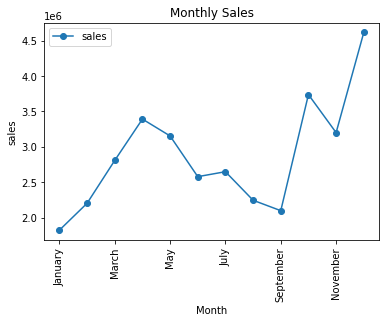

In [24]:
# Sales trend during the year 2019
lines = monthly_sales.plot.line('Full_Month', 'sales', marker='o')
y= monthly_sales['sales']
x= monthly_sales['Full_Month']
plt.xlabel('Month')
plt.ylabel('sales')
plt.title('Monthly Sales')
plt.xticks(rotation=90)
plt.show()


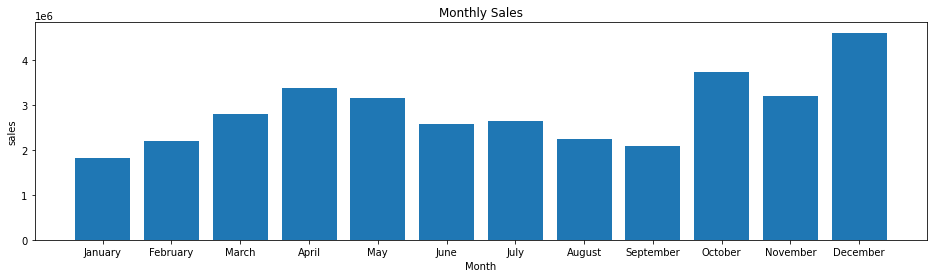

In [25]:
# Finding best month for sales
# Set the figure size (optional)
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.bar(monthly_sales['Full_Month'], monthly_sales['sales'])

# Add labels and title
plt.ylabel('sales')
plt.xlabel('Month')
plt.title('Monthly Sales')
plt.xticks(monthly_sales['Full_Month'])

# Show the plot
plt.show()


In [26]:
# Highest sales month is December

In [27]:
df_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Full_Month', 'sales'],
      dtype='object')

In [28]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99


In [29]:
# Extract city from 'Purchase Address'
df_sales['Post Code'] = df_sales['Purchase Address'].apply(lambda x: x.split(' ')[-1])
df_sales['State'] = df_sales['Purchase Address'].apply(lambda x: x.split(' ')[-2])
df_sales['City'] = df_sales['Purchase Address'].apply(lambda x: x.split(',')[1])

In [30]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales,Post Code,State,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00,02215,MA,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95,97035,OR,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98,94016,CA,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99,90001,CA,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99,73301,TX,Austin


In [31]:
# Calculate sales volume by city
sale_city =df_sales.groupby('City').sum()[['sales']].reset_index()
# Fix 'City' column data type 
sale_city['City']=  sale_city['City'].astype('str')
sale_city.head()

,City,sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80


In [32]:
unique_count = sale_city['City'].nunique()
print(unique_count)

9


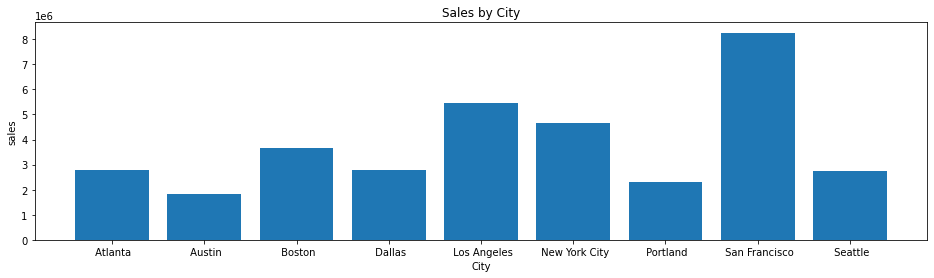

In [33]:
# Finding best city for sales in 2019
# Set the figure size (optional)
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.bar(sale_city['City'], sale_city['sales'])

# Add labels and title
plt.xlabel('City')
plt.ylabel('sales')
plt.title('Sales by City')
plt.xticks(sale_city['City'])

# Show the plot
plt.show()

In [34]:
# San Francisco had highest sales during year 2019

In [35]:
# Extract hours from 'Order Date'
df_sales['Hour'] = df_sales['Order Date'].dt.hour

In [36]:
#Extract minutes from 'Order Date'
df_sales['Minute'] = df_sales['Order Date'].dt.minute

In [37]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales,Post Code,State,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00,02215,MA,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95,97035,OR,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98,94016,CA,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99,90001,CA,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99,73301,TX,Austin,11,59


In [38]:
Orders_by_hour= df_sales.groupby('Hour').count()[['Order ID']].reset_index()

In [39]:
unique_count = Orders_by_hour['Hour'].nunique()
print(unique_count)

24


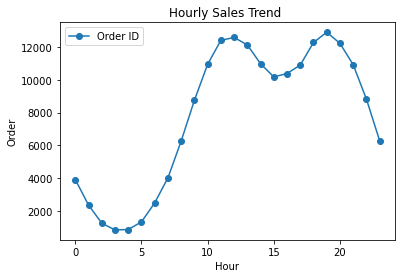

In [40]:
# Hourly sales trend
lines = Orders_by_hour.plot.line('Hour', 'Order ID', marker='o')
y= Orders_by_hour['Order ID']
x= Orders_by_hour['Hour']
plt.xlabel('Hour')
plt.ylabel('Order')
plt.title('Hourly Sales Trend ')
plt.show()


In [41]:
# Best time to display advertisements is between 10am to 8pm, as most customers are placing orders during these hours

In [42]:
#Extract 'Orderd ID' from DataFrame 
Multiple_Orders= df_sales[df_sales['Order ID'].duplicated(keep= False)]
Multiple_Orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales,Post Code,State,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.95,73301,TX,Austin,16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.99,73301,TX,Austin,16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,150.00,90001,CA,Los Angeles,8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,11.52,90001,CA,Los Angeles,8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,January,400.00,10001,NY,New York City,11,19


In [43]:
# Products are grouped by Order ID and combined in single column 'Grouped'
Multiple_Orders['Grouped'] = Multiple_Orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Somiya\AppData\Local\Temp/ipykernel_70780/827087216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Multiple_Orders['Grouped'] = Multiple_Orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [44]:
# dropping any duplicate results for unique combination counts
Multiple_Orders =  Multiple_Orders[['Order ID', 'Grouped']].drop_duplicates()

In [45]:
Multiple_Orders.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [46]:
Multiple_Orders.shape

(7136, 2)

In [47]:
# import iteratros and counters
from itertools import combinations
from collections import Counter

In [48]:
results_df = pd.DataFrame(columns=['Products', 'Number'])

In [49]:
# Products order together
# Number of orders on certain combinations
pcount = Counter()

for prod in Multiple_Orders['Grouped']:
    prod_list = prod.split(',')
    pcount.update(Counter(combinations(prod_list,2)))
    
    
for prod, pcount in pcount.most_common(10):
    print(prod,': ',pcount)
    results_df = results_df.append({'Products': prod, 'Number': pcount}, ignore_index=True)
results_df  = results_df.sort_values('Number')

('iPhone', 'Lightning Charging Cable') :  1005
('Google Phone', 'USB-C Charging Cable') :  987
('iPhone', 'Wired Headphones') :  447
('Google Phone', 'Wired Headphones') :  414
('Vareebadd Phone', 'USB-C Charging Cable') :  361
('iPhone', 'Apple Airpods Headphones') :  360
('Google Phone', 'Bose SoundSport Headphones') :  220
('USB-C Charging Cable', 'Wired Headphones') :  160
('Vareebadd Phone', 'Wired Headphones') :  143
('Lightning Charging Cable', 'Wired Headphones') :  92


In [50]:
# TOP 10 products: most often sold together
#('iPhone', 'Lightning Charging Cable') :  1005
#('Google Phone', 'USB-C Charging Cable') :  987

In [51]:
# change objects to data types for further manipulation.
results_df ['Products'] =results_df ['Products'].astype(str)
results_df ['Number'] =results_df ['Number'].astype(int)

In [52]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 9 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  10 non-null     object
 1   Number    10 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 200.0+ bytes


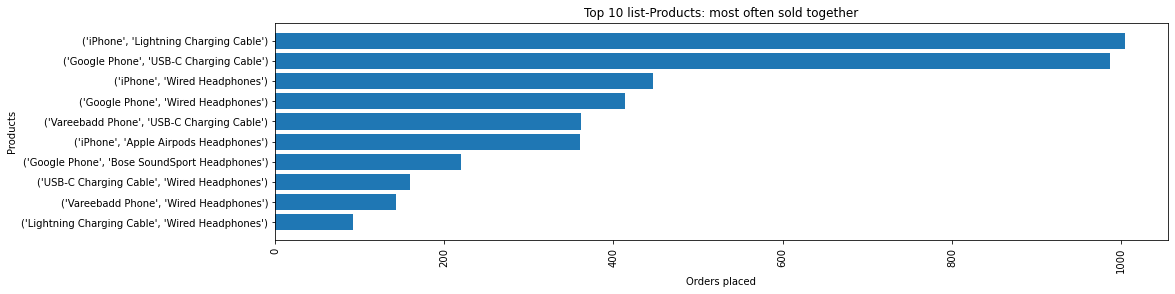

In [64]:
# Barh graph to compare which products are best sold together
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.barh(results_df['Products'], results_df['Number'])

# Add labels and title
plt.xlabel('Orders placed')
plt.ylabel('Products')
plt.title('Top 10 list-Products: most often sold together')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [65]:
# Most Sold Products
Product_quantity =df_sales.groupby('Product').sum()[['Quantity Ordered']].reset_index()
Product_quantity  = Product_quantity.sort_values('Quantity Ordered', ascending=False)

In [66]:
Product_quantity.head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


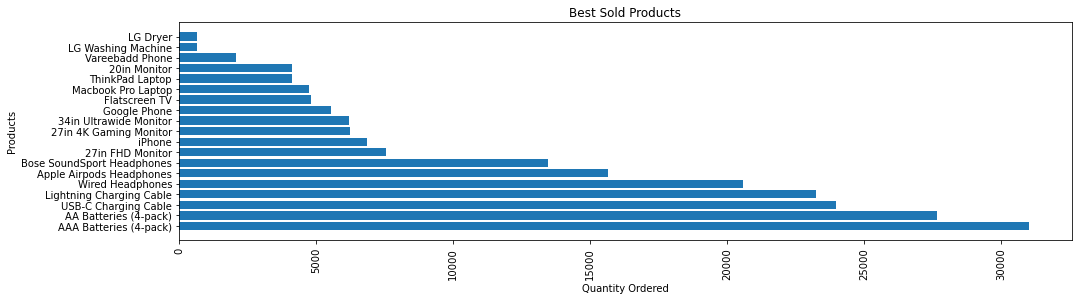

In [67]:
# Barh graph to compare which products are best sold together
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.barh(Product_quantity['Product'], Product_quantity['Quantity Ordered'])

# Add labels and title
plt.xlabel('Quantity Ordered')
plt.ylabel('Products')
plt.title('Best Sold Products')
plt.xticks(rotation=90)

# Show the plot
plt.show()